# Data Assesment

#### Group-10

#### Project Title : Estimating & Comparing Public Transport Emissions using gtfs2emis

##### The GTFS (General Transit Feed Specification) data is used to calculate the emissions generated by public transportation services. To estimate the emissions levels of public transport vehicles, we use the gtfs2emis R package, which is based on the GTFS data. Currently, the package has data from four countries, and we are focusing on the Detroit, USA data. The data is based on the MOVES Emission Model, which is a dataset that models emissions from vehicles and other moving sources. This dataset includes information such as the type of vehicle (such as transit buses), speed intervals, type of pollutants, and fleet information, all of which is used to estimate the emissions generated.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
data = pd.read_csv("ef_usa_moves_db.csv")

In [5]:
# Check the size of the dataset
print("Number of rows: ", data.shape[0])
print("Number of columns: ", data.shape[1])

Number of rows:  198144
Number of columns:  9


Our data set has 1,98,144 records and having 9 features.

In [6]:
# Check the first 5 rows of the data
data.head()

,fuel_type,reference_year,model_year,pollutant,lower_speed_interval,upper_speed_interval,ef,source_type,id_speed
0,CNG,2015,1989,CH4,0.0,4.0,69.123508,Transit Bus,1
1,CNG,2015,1989,CH4,4.0,12.1,41.044210,Transit Bus,2
2,CNG,2015,1989,CH4,12.1,20.1,28.991626,Transit Bus,3
3,CNG,2015,1989,CH4,20.1,28.2,24.887222,Transit Bus,4
4,CNG,2015,1989,CH4,28.2,36.2,21.287275,Transit Bus,5


### Assessment for Data Quality

##### Identifying issues in all of the columns

##### Below is the Dataset features information:

##### 1. fuel_type : 
The data type is character; Total 3 categories i.e Type of fuel: 'D' (Diesel),'G' (Gasoline),'CNG' (Compressed Natural Gas).

##### 2. reference_year : 
The datatype is numeric; Calendar Year between 2015 - 2022. Year in which the emissions inventory is estimated.

##### 3. model_year : 
The datatype is numeric; Model year of vehicle. We have Transit bus fleet data is available from 1985 to 2022.

##### 4. pollutant  : 
The data type is character; Total 18 pollutants are available.

##### 5. lower_speed_interval : 
The datatype is float; units 'km/h'; Represents the lower value of the speed intervals.

##### 6. upper_speed_interval : 
The datatype is float; units in km/h; Represents the upper value of the speed intervals.

##### 7. ef : 
The datatype is float; Emission factor estimates are expressed in units 'g/km'.

##### 8. source_type : 
The data type is character; Type of vehicle, which currently has only "Transit Bus".

##### 9. id_speed: 
The datatype is numeric.

In [7]:
# Check for missing values in each column
print(data.isnull().sum())

fuel_type               0
reference_year          0
model_year              0
pollutant               0
lower_speed_interval    0
upper_speed_interval    0
ef                      0
source_type             0
id_speed                0
dtype: int64


#####   In our datasets there are no "Null Values"

In [8]:
# Summary statistics of the dataset
data.describe()

,reference_year,model_year,lower_speed_interval,upper_speed_interval,ef,id_speed
count,198144.000000,198144.000000,198144.000000,198144.000000,1.981440e+05,198144.000000
mean,2018.566376,2004.108204,56.581250,64.125000,9.866747e+05,8.500000
std,2.288921,8.906944,36.691597,36.690955,4.897268e+06,4.609784
min,2015.000000,1985.000000,0.000000,4.000000,9.920000e-06,1.000000
25%,2017.000000,1997.000000,26.175000,34.200000,1.694340e-02,4.750000
50%,2019.000000,2004.000000,56.350000,64.400000,2.016862e-01,8.500000
75%,2021.000000,2012.000000,86.500000,94.525000,4.562194e+00,12.250000
max,2022.000000,2022.000000,116.700000,120.700000,8.541058e+07,16.000000


### Data Cleaning Steps

###### Step 1: 

The data set contains columns for lower and upper speed intervals. Our analysis revealed that lower speed intervals ranging from 0 to 68.4 are recorded in km/h, while intervals exceeding 72.5 are in mph. Based on our findings, the ideal speed limit for transit buses within city limits should not exceed 100 km/h. As a result, we have excluded data with lower speed intervals greater than 72.5 mph from the lower_speed_interval column. The upper speed interval units are recorded in km/h.

Note : The speed intervals above 72.5 mph (miles/h) are considered outliers and were removed from the data set during the analysis.

In [9]:
data= data[data['lower_speed_interval'] <= 68.4]
data

,fuel_type,reference_year,model_year,pollutant,lower_speed_interval,upper_speed_interval,ef,source_type,id_speed
0,CNG,2015,1989,CH4,0.0,4.0,69.123508,Transit Bus,1
1,CNG,2015,1989,CH4,4.0,12.1,41.044210,Transit Bus,2
2,CNG,2015,1989,CH4,12.1,20.1,28.991626,Transit Bus,3
3,CNG,2015,1989,CH4,20.1,28.2,24.887222,Transit Bus,4
4,CNG,2015,1989,CH4,28.2,36.2,21.287275,Transit Bus,5
...,...,...,...,...,...,...,...,...,...
198133,G,2022,2022,VOC,36.2,44.3,0.058130,Transit Bus,6
198134,G,2022,2022,VOC,44.3,52.3,0.053977,Transit Bus,7
198135,G,2022,2022,VOC,52.3,60.4,0.050374,Transit Bus,8
198136,G,2022,2022,VOC,60.4,68.4,0.049005,Transit Bus,9


###### Step 2: 

Removing the Irrelevant columns "id_speed" from the dataset as this feature doesn't have any importance in our dataset

In [10]:
data.drop(['id_speed'], axis=1, inplace=True)

## Assesment for Data Fitness

In [11]:
data.head()

,fuel_type,reference_year,model_year,pollutant,lower_speed_interval,upper_speed_interval,ef,source_type
0,CNG,2015,1989,CH4,0.0,4.0,69.123508,Transit Bus
1,CNG,2015,1989,CH4,4.0,12.1,41.044210,Transit Bus
2,CNG,2015,1989,CH4,12.1,20.1,28.991626,Transit Bus
3,CNG,2015,1989,CH4,20.1,28.2,24.887222,Transit Bus
4,CNG,2015,1989,CH4,28.2,36.2,21.287275,Transit Bus


In [12]:
data.shape

(123840, 8)

#### The dataset, after being cleaned, contains 1,23,3840 rows and 8 features. The aim of the project is to determine the pollutant with the highest emission from transit buses, the fuel type of transit buses with the highest emission at certain average speeds, and the fleets in need of upgrading. The model will also analyze the fluctuations in emission factors over time and predict future emission factors. Currently, the dataset is not suitable for comparison with other countries' emission rates as it lacks common features of other countries' fleets.

#### Research Question 1: What Tranist bus fuel type is identified as the largest source of emissions and how can reduction strategies be prioritized?

Answer 1: The available data is sufficient since it contains information on three different fuel types, namely Diesel, Gasoline, and CNG.

#### Research Question 2: What model year fleet is creating the highest emissions and requires replacement or upgrading?

Answer 2: The current data is adequate as it includes transit bus fleet information from 1985 to 2022.

#### Research Question 3: At which average speed interval does the transit bus generate the least amount of emissions?

Answer 3: The available data is adequate as it includes information about the upper and lower speed intervals.

#### Research Question 4: What is the trend of average emission over time?

Answer 4: The current data is sufficient as we have reference year data from 2015 to 2022 available with regards to the emission factor.

#### Research Question 5: What is the average emission rate for each fuel type?

Answer 5: The available data is adequate for the purpose.


### Ethical Assessment for data collection and usage

#### Data Science Ethics Checklist

# Data Science Ethics Checklist [![Deon badge](https://img.shields.io/badge/ethics%20checklist-deon-brightgreen.svg?style=popout-square)](http://deon.drivendata.org/) ## A. Data Collection
- [ ] **A.1 Informed consent**: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent? 
##### As a team we have taken data from R package called gfts2emis. However, the data is collected in a way that respects individual privacy and complies with relevant data protection laws and regulations.
- [ ] **A.2 Collection bias**: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?
##### Our team has considered sources of bias in the collection of public transport emission data include the accuracy of the measurement models, algorithms, equipment's and techniques used. To mitigate these risks, we have used reliable techniques for data collection.
- [ ] **A.3 Limit PII exposure**: Have we considered ways to minimize exposure of personally identifiable information (PII) for example through anonymization or not collecting information that isn't relevant for analysis?
##### Our team has considered minimizing the exposure of PII when collecting public transport emission data. We considerably have given thought to achieve this by anonymizing the data, or by only collecting the minimum amount of data necessary for the analysis.
- [ ] **A.4 Downstream bias mitigation**: Have we considered ways to enable testing downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?
##### Yes, we have given a considerable thought to test downstream biased outcomes by surveying the socio-economic status of the areas served by the public transport system, or the type of vehicle model year used. This information can then be used to test  and address any potential sources of bias in the analysis. ## B. Data Storage
- [ ] **B.1 Data security**: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?
##### To protect the security of the public transport emission data, we can implement robust data security measures, such as encryption both at rest and in transit, access controls on internal users and third parties, access logs, and the use of up-to-date software.
- [ ] **B.2 Right to be forgotten**: Do we have a mechanism through which an individual can request their personal information be removed?
##### Since the data has been selected from R package called gtfs2emis where the identity is not public henceforth, the question to have a mechanism where people could request for the removal of their information does not comply here. 
- [ ] **B.3 Data retention plan**: Is there a schedule or plan to delete the data after it is no longer needed?
##### Yes, our team can ensure that the data is only kept for as long as it is needed for the analysis, and is then securely deleted. 

## Exploratory data analysis

### 1.Univariate Analysis:This involves analyzing each variable individually, usually through summary statistics and visualizations such as bar plots and box plots.

### 1.1 Bar chart of the fuel type distribution

In [13]:
# Analyze the fuel type column
fuel_types = data['fuel_type'].value_counts()

In [14]:
fuel_types

D      44640
G      43200
CNG    36000
Name: fuel_type, dtype: int64

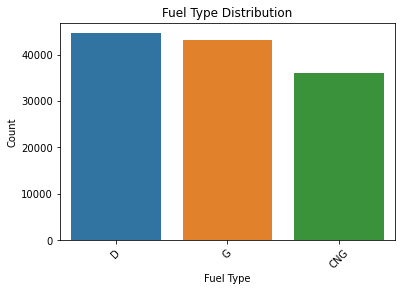

In [15]:
# Plot a bar chart of the fuel type distribution
sns.barplot(x=fuel_types.index, y=fuel_types.values)
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Fuel Type Distribution')
plt.xticks(rotation=45)
plt.show()

#### The highest number of values in our dataset belongs to the Diesel category.

### 2. Bivariate Analysis: This involves analyzing the relationships between two variables, using visualizations such as scatter plots, line plots and density plots.

#### 2.1 Relationship between pollutant and emission factor

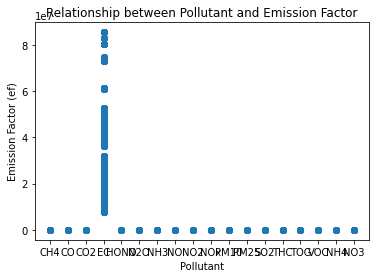

In [16]:
# Extract the pollutant and emission factor columns
pollutants = data['pollutant']
efs = data['ef']

# create the scatter plot
plt.scatter(pollutants, efs)

# add labels and title to the plot
plt.xlabel('Pollutant')
plt.ylabel('Emission Factor (ef)')
plt.title('Relationship between Pollutant and Emission Factor')

# display the plot
plt.show()

#### The graph above illustrates the correlation between pollutant and emission factor. The analysis includes all 18 pollutants, however, it is observed that the EC pollutant is an anomaly in the data. It is concluded that not all pollutants contribute significantly to the generation of emissions from transit buses and that only 10 pollutants are significant for further analysis.

#### 2.2 Relationship between Group by top 5 pollutant and emission factor

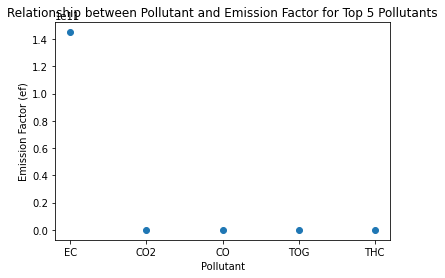

In [17]:
# Group the data by top 5 pollutant and sum the emission factors for each pollutant
grouped = data.groupby('pollutant').sum()

# sort the data by the total emission factor for each pollutant
sorted_df = grouped.sort_values('ef', ascending=False)

# select the top 5 pollutants
top_5 = sorted_df.head(5)

# extract the pollutant and emission factor columns for the top 5 pollutants
pollutants = top_5.index
efs = top_5['ef']

# create the scatter plot
plt.scatter(pollutants, efs)

# add labels and title to the plot
plt.xlabel('Pollutant')
plt.ylabel('Emission Factor (ef)')
plt.title('Relationship between Pollutant and Emission Factor for Top 5 Pollutants')

# display the plot
plt.show()


#### The above graph displays the relationship between the top 5 pollutants and the emission factor. EC, or Energy Consumption, pollutant has the highest emission factor among the five. Energy consumption plays a crucial role in contributing to greenhouse gas emissions. Out of the seven pollutants that have a significant impact on the pollution caused by transit bus emissions, we will focus our further analysis on these pollutants for all fleets. However, EC pollutant is considered an outlier in the data set due to its unusual values, and will not be included in our subsequent analysis.

#### 2.3 Important 7 Pollutants for future analysis with Emission Factor

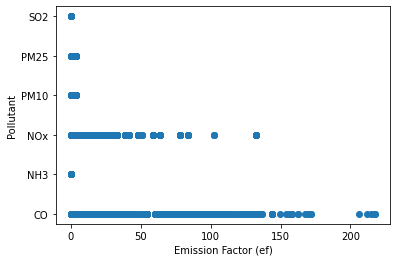

In [18]:
# Select only the columns of interest
df = data[['ef', 'pollutant']]

# Create a list of the pollutants you want to include
selected_pollutants = ['CO', 'NH3', 'NOx', 'PM10', 'PM25', 'SO2', 'VOCs']

# Filter the data to include only rows with the selected pollutants
df = df[data['pollutant'].isin(selected_pollutants)]

# Plot the relationship between ef and each pollutant
plt.scatter(df['ef'], df['pollutant'])
plt.xlabel('Emission Factor (ef)')
plt.ylabel('Pollutant')
plt.show()


#### The above graph indicates that CO and NOx are the top two contributors to the emission factor, surpassing the other five pollutants.

#### 2.4 Relationship between Fuel Type and emission factor

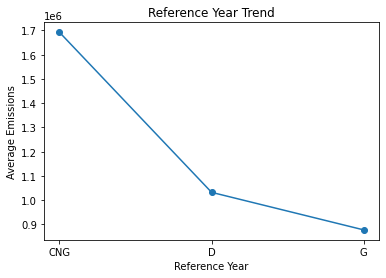

In [19]:
# Group the data by reference year and calculate the average emissions for each year
reference_years = data.groupby('fuel_type').mean()['ef']

# Plot a line chart of the reference year trend
plt.plot(reference_years.index, reference_years.values, '-o')
plt.xlabel('Reference Year')
plt.ylabel('Average Emissions')
plt.title('Reference Year Trend')
plt.show()

#### The line graph clearly shows that when compared to Diesel and Gasoline, CNG has the highest emission rate.

#### 2.5 Relationship between Model Year and emission factor

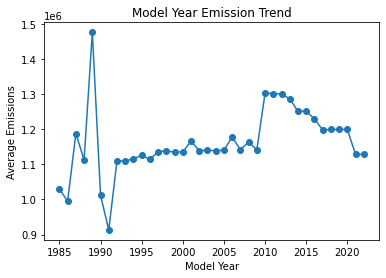

In [20]:
# Group the data by fuel type and calculate the average emissions for fuel type
fuel_type_emission = data.groupby("model_year").mean()['ef']

# Plot a line chart of the reference year trend
plt.plot(fuel_type_emission.index, fuel_type_emission.values, '-o')
plt.xlabel('Model Year')
plt.ylabel('Average Emissions')
plt.title('Model Year Emission Trend')
plt.show()

#### The line graph indicates that buses from 1987 to 1990 have the highest emission rate.

#### 2.6 Relationship between Refrence Year and Emission factor

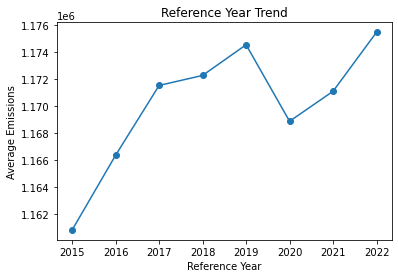

In [21]:
# Group the data by reference year and calculate the average emissions for each year
reference_years = data.groupby('reference_year').mean()['ef']

# Plot a line chart of the reference year trend
plt.plot(reference_years.index, reference_years.values, '-o')
plt.xlabel('Reference Year')
plt.ylabel('Average Emissions')
plt.title('Reference Year Trend')
plt.show()

#### The line graph displays an increase in emission rate over the years, but it also shows a decrease in the emission rate during the year 2020, likely due to the impact of the COVID-19 pandemic.

### 3.Multivariate Analysis: This involves analyzing the relationships among three or more variables. This can be done through visualizations such as scatter plots matrix and heatmap.

In [22]:
# Analyze the lower speed interval and upper speed interval columns
speed_intervals = data.groupby(['lower_speed_interval', 'upper_speed_interval']).mean()

### 3.1 Heatmap of the average emissions by upper, lower speed interval

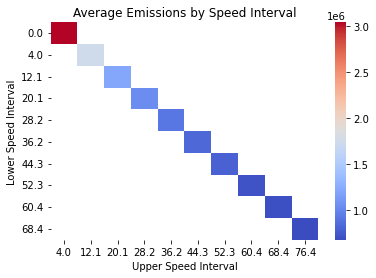

In [23]:
# Plot a heatmap of the average emissions by upper, lower speed interval
sns.heatmap(speed_intervals['ef'].unstack(), cmap='coolwarm')
plt.xlabel('Upper Speed Interval')
plt.ylabel('Lower Speed Interval')
plt.title('Average Emissions by Speed Interval')
plt.show()

#### The heat map indicates that the speed interval ranging from 0 to 4 has the highest emission rate.

### 3.2 Create the scatter plot with respect to fuel type, Average Speed and Emission Factor

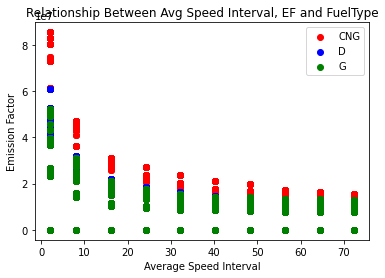

In [26]:
# Create the scatter plot fuel type, Average Speed and Emission Factor
data['average_speed_interval'] = (data['lower_speed_interval'] + data['upper_speed_interval']) / 2
fuel_types = data['fuel_type'].unique()
colors = ['red', 'blue', 'green']
for fuel_type, color in zip(fuel_types, colors):
    df_fuel_type = data[data['fuel_type'] == fuel_type]
    plt.scatter(df_fuel_type['average_speed_interval'], df_fuel_type['ef'], color=color, label=fuel_type)
plt.xlabel('Average Speed Interval')
plt.ylabel('Emission Factor')
plt.title('Relationship Between Avg Speed Interval, EF and FuelType')
plt.legend()
plt.show()

#### The above graph illustrates the correlation between the Average Speed Interval, Emission Factor, and Fuel Type. It demonstrates that CNG transit buses produce the most emissions at average speeds of 0-10 km/h, compared to those using Diesel and Gasoline fuels. Conversely, it reveals that diesel transit buses generate significantly lower emissions at average speeds of 50-70 km/h.

### 3.3 Relationship between Pollutant, Average Speed Interval, and Emission Factor

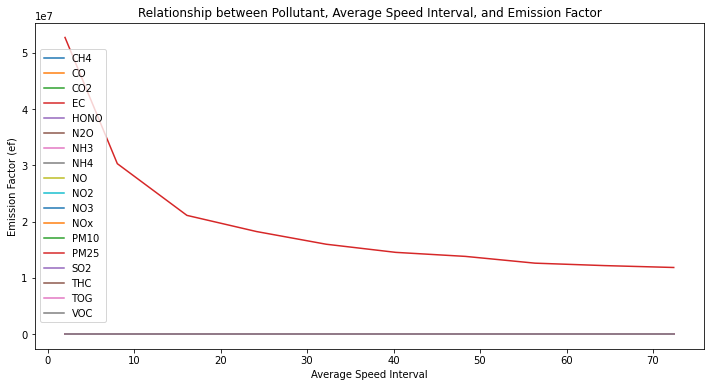

In [27]:
# group the data by pollutant and average speed interval and find the mean of each pollutant at each speed interval
grouped = data.groupby(['pollutant', 'average_speed_interval']).mean()

# reset the index to get the pollutant and average speed interval as columns
grouped.reset_index(inplace=True)

# plot the relationship between pollutant, average speed interval, and emission factor
plt.figure(figsize=(12,6))
for pollutant in grouped['pollutant'].unique():
    subset = grouped[grouped['pollutant'] == pollutant]
    plt.plot(subset['average_speed_interval'], subset['ef'], label=pollutant)

# add labels and title to the plot
plt.xlabel('Average Speed Interval')
plt.ylabel('Emission Factor (ef)')
plt.title('Relationship between Pollutant, Average Speed Interval, and Emission Factor')
plt.legend()

# display the plot
plt.show()

### 3.4 Relationship between Pollutant excluding Energy Consumption , Average Speed Interval, and Emission Factor

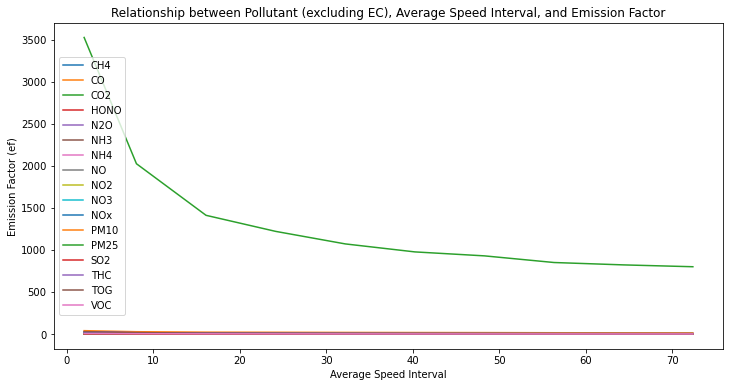

In [28]:
# exclude the rows with pollutant 'EC'
df = data[data['pollutant'] != 'EC']

# group the data by pollutant and average speed interval and find the mean of each pollutant at each speed interval
grouped = df.groupby(['pollutant', 'average_speed_interval']).mean()

# reset the index to get the pollutant and average speed interval as columns
grouped.reset_index(inplace=True)

# plot the relationship between pollutant, average speed interval, and emission factor
plt.figure(figsize=(12,6))
for pollutant in grouped['pollutant'].unique():
    subset = grouped[grouped['pollutant'] == pollutant]
    plt.plot(subset['average_speed_interval'], subset['ef'], label=pollutant)

# add labels and title to the plot
plt.xlabel('Average Speed Interval')
plt.ylabel('Emission Factor (ef)')
plt.title('Relationship between Pollutant (excluding EC), Average Speed Interval, and Emission Factor')
plt.legend()

# display the plot
plt.show()